In [2]:
import numpy as np
import pandas as pd
import os
import pymysql
from sqlalchemy import create_engine
import getpass

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [3]:
os.chdir('C:\\Users\\mcoge\\Downloads')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '1.2.ipynb',
 '1.3 1111 Wednesday.ipynb',
 '1.4 1112 Thursday.ipynb',
 '1.5.ipynb',
 '2.1 Screen Shot 2016-04-17 at 12.22.49 PM.png',
 '2.1.sql',
 '2.2.sql',
 '2.3.ipynb',
 '20190308-years.csv',
 '20201115_Risk_Version_14h50.py',
 '3.2.ipynb',
 '3.3.ipynb',
 '3.4.ipynb',
 '4.1 3011 Monday.ipynb',
 'AppleStore.csv',
 'apple_store.csv',
 'archive',
 'archive(1)',
 'archive(1).zip',
 'archive.zip',
 'boo.pdf',
 'capture-python-rock-paper-scissors.JPG',
 'Command Prompt Cheatsheet(1).pdf',
 'Command Prompt Cheatsheet.pdf',
 'CV Matthieu Coget Social media manager.pdf',
 'Data Aggregations.sql',
 'dataft.pdf',
 'desktop.ini',
 'Employees.csv',
 'ENG Ironhack Attestation Inscription 00174.pdf',
 'finance',
 'finance.zip',
 'fr.openfoodfacts.org.products.csv',
 'Git-2.28.0-64-bit.exe',
 'GitHubDesktopSetup.exe',
 'gorges-de-kakuetta-08.jpg',
 'Importing and Export Data.ipynb',
 'index.jpg',
 'index.png',
 'Lab - My first queries.sql',
 'main-solutions.ipynb',
 'mars-20

In [11]:
employees=pd.read_csv('employees.csv')
employees

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38
...,...,...,...,...,...,...
495,Sales,PhD,VP,Calvin,2,119
496,HR,Master,Analyst,Dustin,6,67
497,Sales,PhD,VP,Winston,13,93
498,IT,PhD,Analyst,Earl,12,108


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [16]:
# Method 1
# your code here
employees[['Department','Salary']].groupby(['Department']).mean()

,Salary
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


In [26]:
# Method 2
employees.groupby(['Department'])['Salary'].agg(['mean'])

,mean
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [80]:
employees.pivot_table(index="Department", columns="Title", values='Salary', aggfunc="mean").round(2)

Title,Analyst,VP,associate
Department,,,
Admin,77.74,75.57,75.81
HR,71.40,75.44,75.93
IT,69.60,74.00,68.10
Sales,76.07,66.68,76.81


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [84]:
(employees.pivot_table(index="Years", columns=["Title"], values='Salary',
                       aggfunc="mean")).round(2)

Title,Analyst,VP,associate
Years,,,
1,75.00,74.71,77.33
2,63.38,83.20,83.25
3,73.39,69.00,83.56
4,77.60,82.33,73.30
5,77.62,80.00,64.33
6,87.44,61.07,74.45
7,67.00,78.69,70.17
8,78.00,54.18,69.50
9,86.45,65.67,76.09


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [83]:
employees.pivot_table(index=["Department"], columns=["Title"], values='Salary', 
                      aggfunc=["mean", "count"]).round(2)ma

mean                    count              
Title      Analyst     VP associate Analyst  VP associate
Department                                               
Admin        77.74  75.57     75.81      38  42        43
HR           71.40  75.44     75.93      42  34        46
IT           69.60  74.00     68.10      45  47        42
Sales        76.07  66.68     76.81      54  40        27

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [86]:
pd.crosstab(employees.Department, employees.Title, employees.Salary,
            aggfunc=["median", "min", "max", "std"]).round(2).T

Department         Admin      HR      IT   Sales
       Title                                    
median Analyst     80.50   72.50   69.00   72.00
       VP          75.50   76.50   71.00   60.00
       associate   79.00   76.00   59.50   79.00
min    Analyst     33.00   31.00   30.00   30.00
       VP          31.00   32.00   31.00   30.00
       associate   30.00   30.00   33.00   31.00
max    Analyst    120.00  119.00  119.00  120.00
       VP         120.00  119.00  120.00  119.00
       associate  119.00  119.00  117.00  120.00
std    Analyst     26.34   25.09   28.42   27.86
       VP          24.93   26.59   25.57   27.02
       associate   26.52   28.06   28.56   28.27

In [9]:
"""

"""

'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [115]:
employees.pivot_table(index=["Department"],values='Salary', 
                      aggfunc=["sum","count"], margins=True)

,sum,count
,Salary,Salary
Department,,
Admin,9388,123
HR,9057,122
IT,9470,134
Sales,8849,121
All,36764,500


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [128]:
employees.pivot_table(index='Department', columns='Title', values=['Years', 'Salary'],
                     aggfunc={'Years': sum, 'Salary': np.mean}).round(2)

Salary                    Years               
Title      Analyst     VP associate Analyst   VP associate
Department                                                
Admin        77.74  75.57     75.81     292  342       306
HR           71.40  75.44     75.93     326  198       351
IT           69.60  74.00     68.10     346  409       336
Sales        76.07  66.68     76.81     441  293       138

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [4]:
fitbit=pd.read_csv('fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [5]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [6]:
fitbit.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.50,916.31,179.0,2698.00,2974.00,3233.00,4351.00
Steps,367.0,10121.59,5594.84,0.0,6730.50,10413.00,13916.50,26444.00
Distance,367.0,8.55,3.41,0.0,6.15,8.29,10.56,20.45
Floors,367.0,11.72,10.34,0.0,5.00,11.00,16.00,101.00
Minutes Sedentary,367.0,563.93,294.79,1.0,520.00,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.41,86.53,0.0,179.00,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.16,20.32,0.0,8.00,24.00,41.50,101.00
Minutes Very Active,367.0,35.72,31.01,0.0,10.50,29.00,54.00,153.00
Activity Calories,367.0,2044.15,2041.27,0.0,1218.50,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.48,154.75,0.0,224.00,337.00,400.50,553.00


In [7]:
fitbit.shape

(367, 14)

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [72]:
fitbit[['Minutes Very Active', 'Steps']].corr()*100

,Minutes Very Active,Steps
Minutes Very Active,100.000000,57.145185
Steps,57.145185,100.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [64]:
import matplotlib.pyplot as plt;

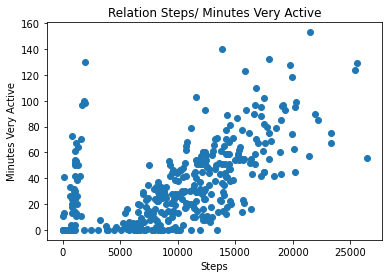

In [146]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])
plt.title('Relation Steps/ Minutes Very Active')
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [19]:
"""
We can see a correlation between the 2 Series : the more you're Very active, the more you have steps in a day.
But there is another line with minutes very active but a very low amount of steps.
"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [9]:
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

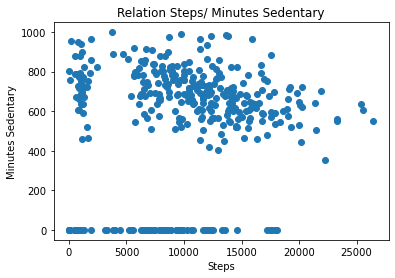

In [152]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Sedentary'])
plt.title('Relation Steps/ Minutes Sedentary')
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
plt.show()

In [12]:
"""
There is no correlation between `Minutes Sedentary` vs `Steps` 
"""

'\nThere is no correlation between `Minutes Sedentary` vs `Steps` \n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [10]:
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

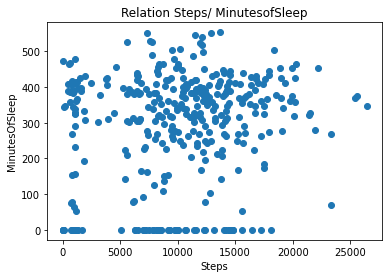

In [158]:
plt.scatter(fitbit['Steps'], fitbit['MinutesOfSleep'])
plt.title('Relation Steps/ MinutesofSleep')
plt.xlabel('Steps')
plt.ylabel('MinutesOfSleep')
plt.show()

In [13]:
"""
There is no correlation between `Minutes Sedentary` vs `Steps` 
"""

'\nThere is no correlation between `Minutes Sedentary` vs `Steps` \n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [15]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [19]:
cor_fit=fitbit[columns].corr()
cor_fit.round(2)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.00,0.26,0.13,0.13,0.20,0.01
Steps,0.26,1.00,0.31,0.08,0.57,0.13
Floors,0.13,0.31,1.00,0.06,0.40,0.07
Minutes Sedentary,0.13,0.08,0.06,1.00,0.11,0.20
Minutes Very Active,0.20,0.57,0.40,0.11,1.00,0.11
MinutesOfSleep,0.01,0.13,0.07,0.20,0.11,1.00


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [22]:
cor_fit.sort_values('Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


In [23]:
# The Minutes Very Active are the only Series really correlated to the steps (57%).
# Even for the floors, the relationship is really weak.

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [26]:
time_grades=pd.read_csv('Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

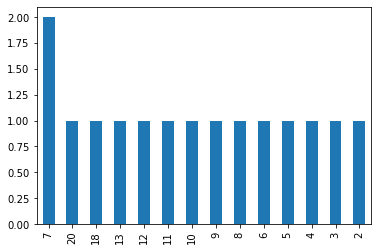

In [60]:
time_grades['Study time'].value_counts().plot(kind='bar')

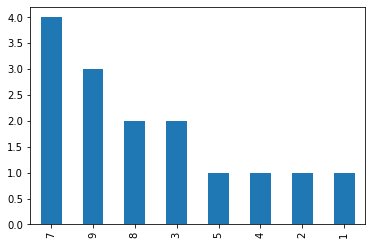

In [50]:
time_grades['Grade'].sort_values().value_counts().plot(kind='bar')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [31]:
time_grades[['Study time', 'Grade']].corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [32]:
time_grades[['Study time', 'Grade']].corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [62]:
"""
There is a strong non-linear correlation between Study time and Grade.
"""

'\nThere is a strong non-linear correlation between Study time and Grade.\nThe more you work, the better is the grade.\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

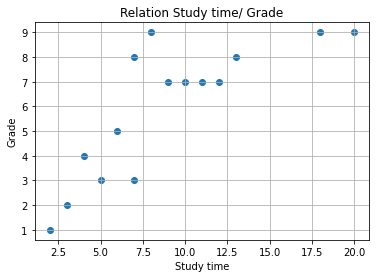

In [66]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Relation Study time/ Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.grid(True)
plt.show()

In [68]:
"""
There is a strong non-linear correlation between Study time and Grade.
Those who studied more than 8 hours have a similiar grade that those who studied 7 hours.
And those wwho studied a little have a little grade.
"""

'\nThere is a strong non-linear correlation between Study time and Grade.\nThose who studied more than 8 hours have a similiar grade that those who studied 7 hours.\nAnd those wwho studied a little have a little grade.\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [35]:
"""
It's an natural algorithm (and the max grade can be 9). 
"""

'\nyour commments here\n'